# the sparks foundation #

# by adnan saify

# Explanatory data analyis on data set 'SampleSupertoreStore'

In [34]:
##Objectives:-1) To Perform Exploratory Data Analysis
##2) Find out business problems
##3) identify key areas for improving profits.


importing required datasets and packages

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

reading csv file

In [3]:
df=pd.read_csv('SampleSuperStore.csv')
mf=df.shape
mf

(9994, 13)

printing the above file

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


totaling and taking mean of every necesary column

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Displaying only state california to look deep into that state 

In [7]:
df.loc[df['State'].str.contains('California')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


comparing phone and appliance in many different ways

In [8]:
import re
sf=df.loc[df['Sub-Category'].str.contains('Phones|Appliances',flags=re.I,regex=True)]
sf.head(30)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
19,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,213.480,3,0.2,16.0110
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737
40,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Technology,Phones,371.168,4,0.2,41.7564
41,Standard Class,Corporate,United States,Naperville,Illinois,60540,Central,Technology,Phones,147.168,4,0.2,16.5564
48,Standard Class,Consumer,United States,Dover,Delaware,19901,East,Technology,Phones,21.800,2,0.0,6.1040


grouping of states and subcategories and then summing up their sales and profit with largest order

In [9]:
top_10_sales=df.groupby("State").Sales.sum().nlargest(n=10)
top_10_profits=df.groupby("State").Profit.sum().nlargest(n=10)
top_10_profit=df.groupby("Sub-Category").Profit.sum().nlargest(n=10)
top_10_sale=df.groupby("Sub-Category").Sales.sum().nlargest(n=10)

In [10]:
top_10_sales.index


Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [11]:
top_10_profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

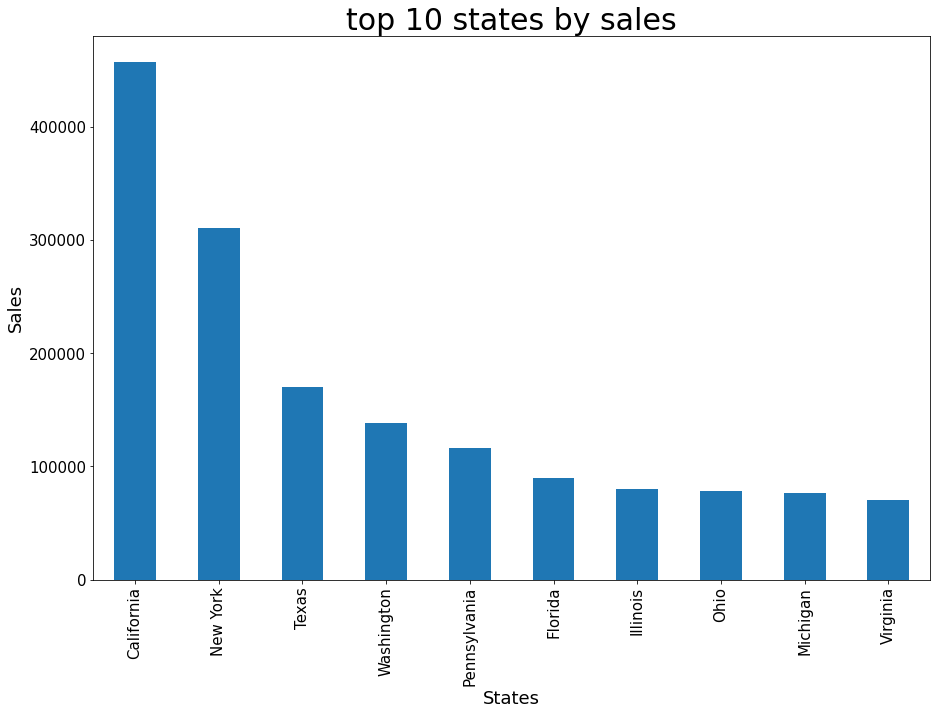

In [37]:

top_10_sales.plot(kind='bar',figsize=(15,10),fontsize=15)
plt.xlabel("States",fontsize=18)
plt.ylabel("Sales",fontsize=18)
plt.title("top 10 states by sales",fontsize=30)
plt.show()

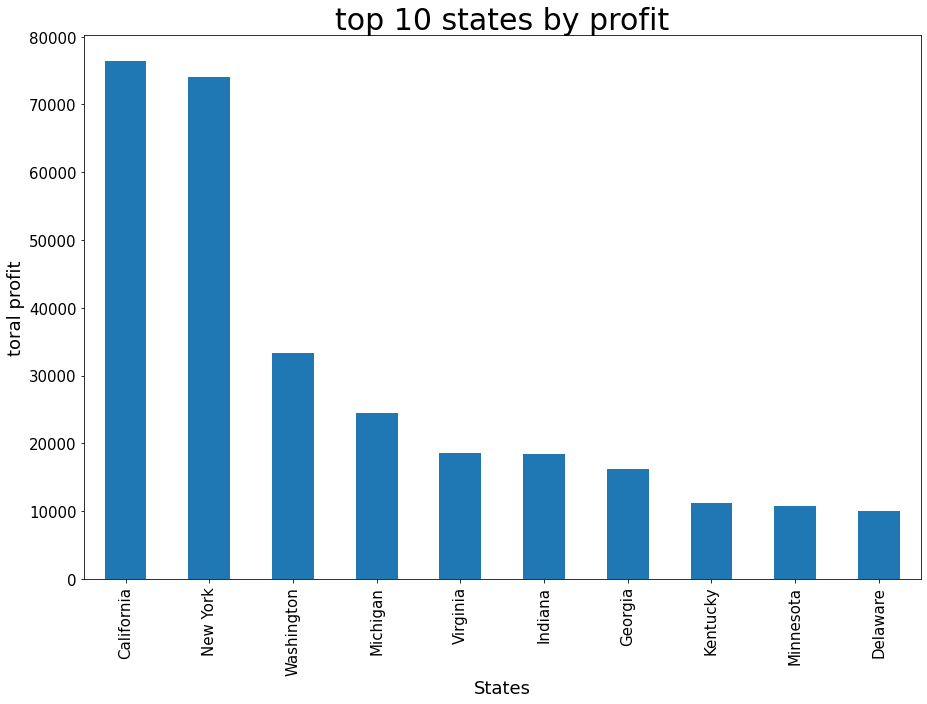

In [38]:

top_10_profits.plot(kind='bar',figsize=(15,10),fontsize=15)
plt.xlabel("States",fontsize=18)
plt.ylabel("toral profit",fontsize=18)
plt.title("top 10 states by profit",fontsize=30)
plt.show()

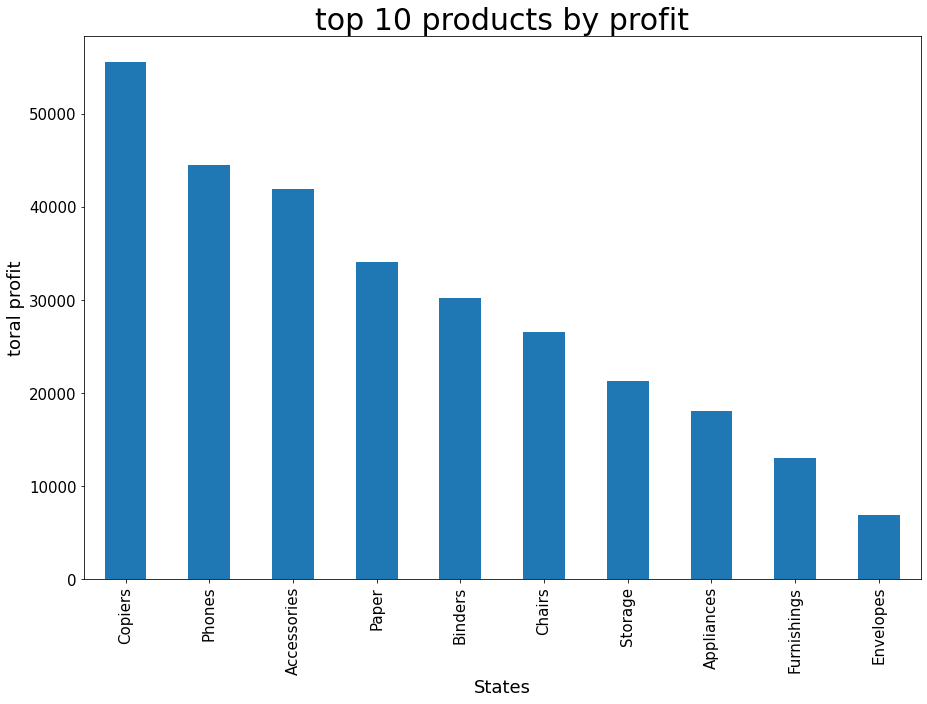

In [39]:

top_10_profit.plot(kind='bar',figsize=(15,10),fontsize=15)
plt.xlabel("States",fontsize=18)
plt.ylabel("toral profit",fontsize=18)
plt.title("top 10 products by profit",fontsize=30)
plt.show()

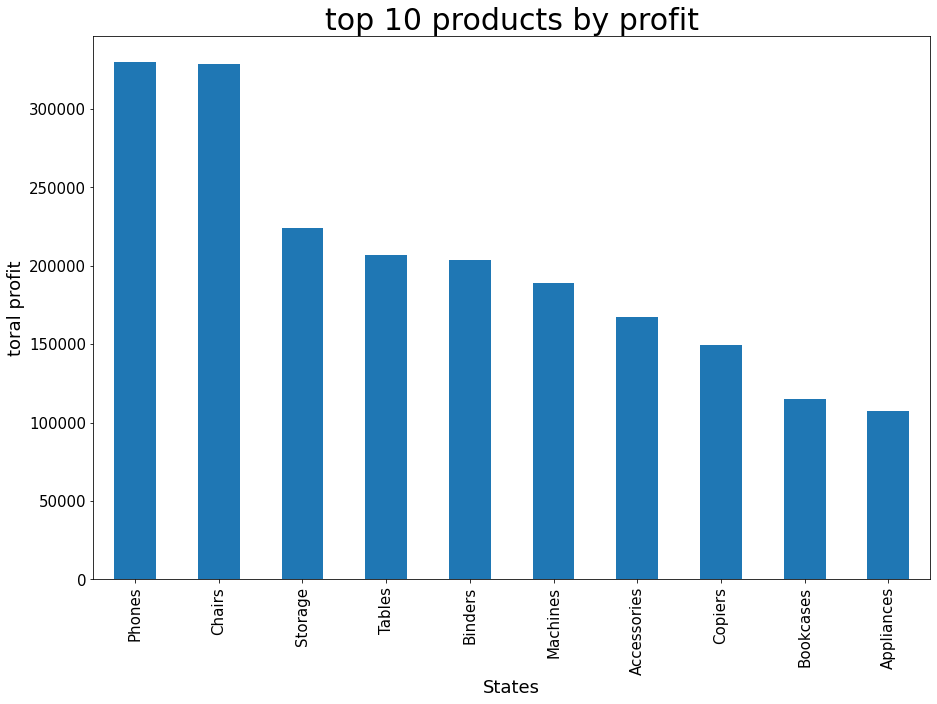

In [40]:

top_10_sale.plot(kind='bar',figsize=(15,10),fontsize=15)
plt.xlabel("States",fontsize=18)
plt.ylabel("toral profit",fontsize=18)
plt.title("top 10 products by profit",fontsize=30)
plt.show()

calculating the mean of sales by grouping the shipmode

In [16]:
ship_mode=df.groupby('Ship Mode')['Sales'].mean()
ship_mode

Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64

# sales vs ship mode

Text(0, 0.5, 'sales')

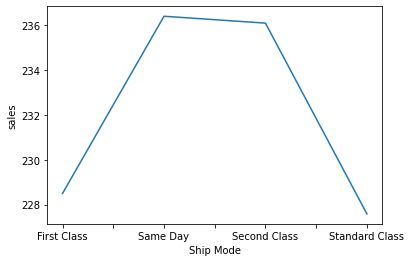

In [17]:
ship_mode.plot()
plt.ylabel("sales")

# visualizing by pie charts

# pie charts of sub categories

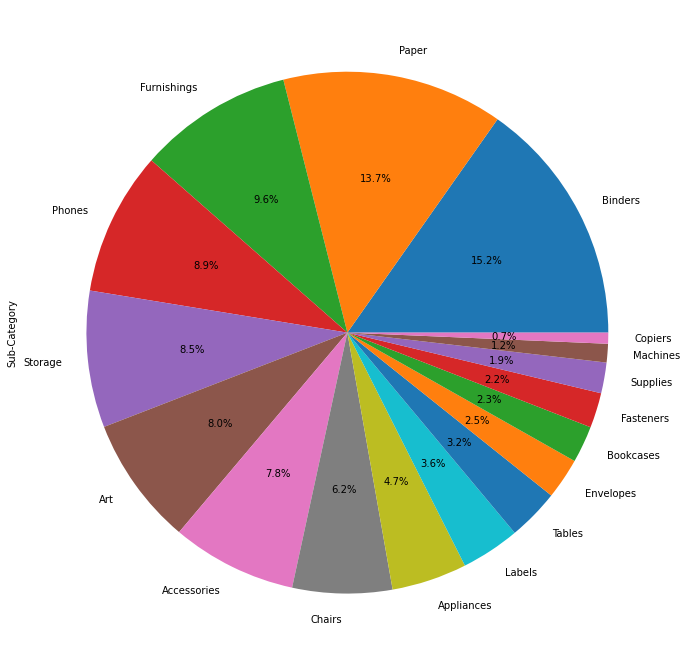

In [18]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#  pie charts of all segments

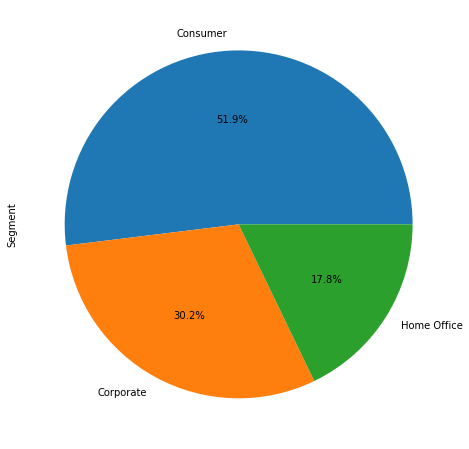

In [19]:
plt.figure(figsize=(10,8))
df['Segment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

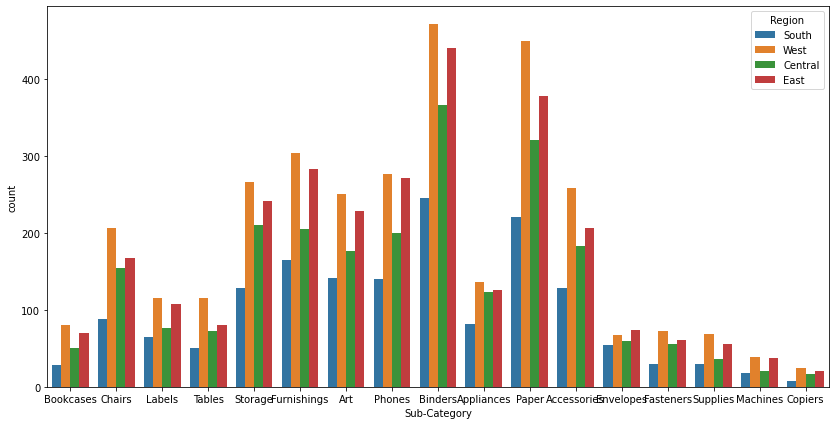

In [20]:
plt.figure(figsize=(14,7))
sns.countplot(x="Sub-Category",hue="Region",data=df)
plt.show()

<ipython-input-43-8e0db7624c94>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


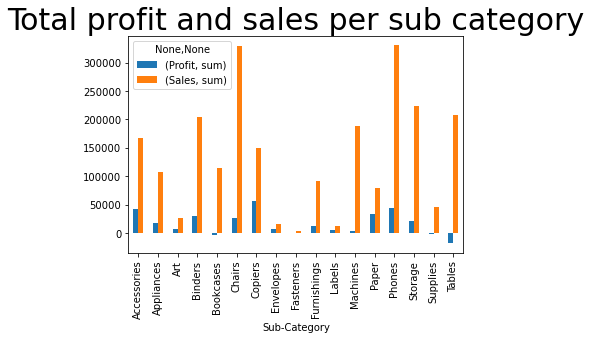

In [43]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per sub category',fontsize=30)
plt.show()

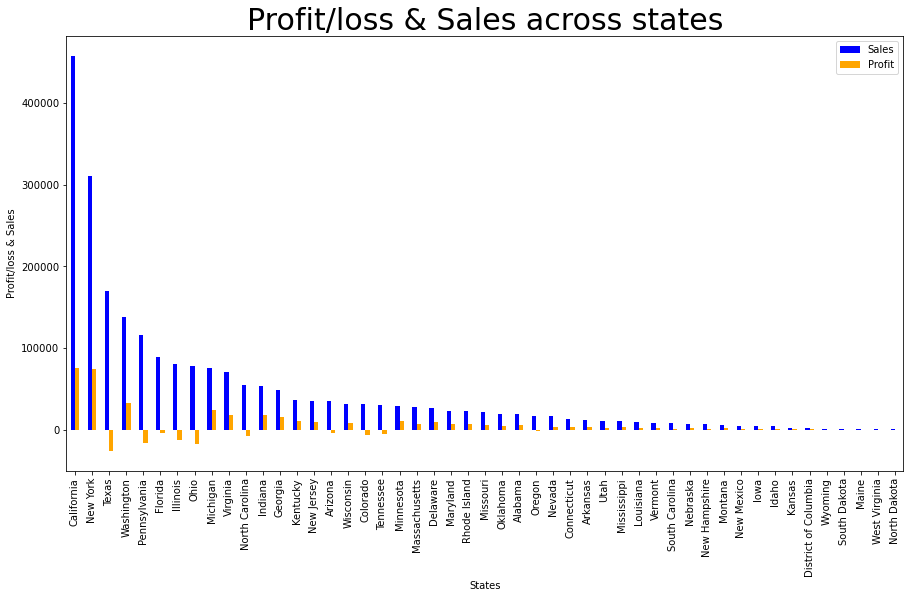

In [42]:
ps=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states',fontsize=30)
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

# profit vs discount

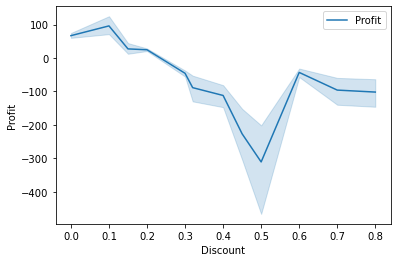

In [29]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

# profit vs quantity

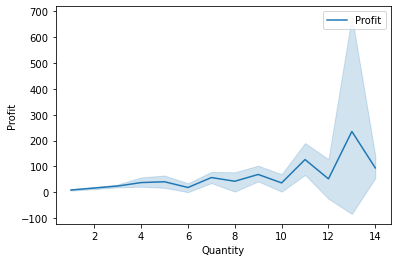

In [30]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

FInding total sales and profit of the store

In [35]:
sales_and_profit=df.groupby('Segment').sum().iloc[:,[1,-1]].sum()
round(sales_and_profit,2)

Sales     2297200.86
Profit     286397.02
dtype: float64

# Total Sales= 2297200.86 USD
# Total Profits= 286397.02 USD